In [2]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

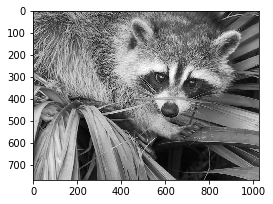

In [3]:
import scipy.misc
import matplotlib.pyplot as plt

f = sp.misc.face(gray=True)

plt.figure(figsize=(10, 3.6))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)
plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show()

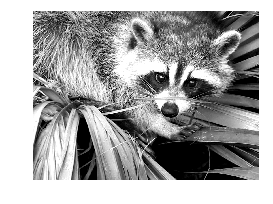

In [4]:
plt.figure(figsize=(10, 3.6))
plt.subplot(132)
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show()

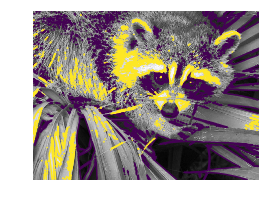

In [5]:
plt.figure(figsize=(10, 3.6))
plt.subplot(133)
plt.imshow(f, cmap=plt.cm.gray)
plt.contour(f, [50, 200])
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show()

In [6]:
f.shape

(768, 1024)

In [7]:
f_r = (f/255.0).reshape(-1,3)

In [8]:
f_r.shape

(262144, 3)

In [15]:
n_clusters = 5
np.random.seed(0)
X = f_r.reshape((-1,1))
k_Means= cluster.KMeans(n_clusters=n_clusters,n_init=4)
k_Means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=4, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
k_colors = KMeans(n_clusters=5).fit(f_r)
y_pred=k_colors.predict(f_r)

In [23]:
k_colors.cluster_centers_.shape

(5, 3)

In [24]:
y_pred = k_colors.predict(f_r)

In [25]:
k_colors.labels_.shape

(262144,)

In [26]:
newimg = k_colors.cluster_centers_[k_colors.labels_]

In [27]:
newimg.shape

(262144, 3)

In [28]:
newimg=np.reshape(newimg,(f.shape))

In [29]:
newimg.shape

(768, 1024)

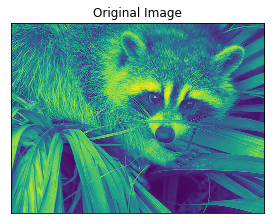

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,xticks=[], yticks=[], title='Original Image')
ax.imshow(f)
plt.show()

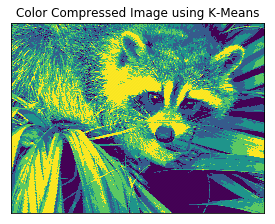

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,2,xticks=[], yticks=[], title='Color Compressed Image using K-Means')
ax.imshow(newimg)
plt.show()

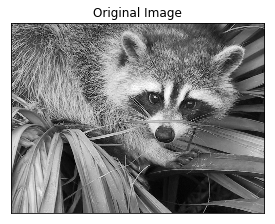

In [38]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,xticks=[], yticks=[], title='Original Grayscale Image')
ax.imshow(f, cmap=plt.cm.gray)
plt.show()

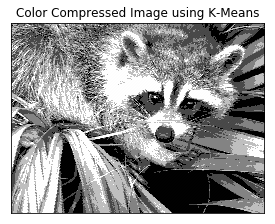

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,2,xticks=[], yticks=[], title='Compressed Grayscale Image using K-Means')
ax.imshow(newimg, cmap=plt.cm.gray)
plt.show()